#### Importing the required Libraries

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

#### Reading the necessary datasets

In [2]:
# Load in csv
recipes_df = pd.read_csv("./Project_Data/RAW_recipes.csv")
recipes_df.head()



,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
interaction_df=pd.read_csv("./Project_Data/RAW_interactions.csv")
interaction_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## cleaning the dataset

In [4]:
recipes_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [5]:
recipes_df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [6]:
#the date is a string converting that into the right format
#from datetime import datetime
# creating a new column, date_parsed, with the parsed dates
recipes_df['submitted_parsed'] = pd.to_datetime(recipes_df['submitted'], format = "%Y/%m/%d")
recipes_df.dtypes


name                        object
id                           int64
minutes                      int64
contributor_id               int64
submitted                   object
tags                        object
nutrition                   object
n_steps                      int64
steps                       object
description                 object
ingredients                 object
n_ingredients                int64
submitted_parsed    datetime64[ns]
dtype: object

In [7]:
#checking if there are missing values
recipes_df.count()

name                231636
id                  231637
minutes             231637
contributor_id      231637
submitted           231637
tags                231637
nutrition           231637
n_steps             231637
steps               231637
description         226658
ingredients         231637
n_ingredients       231637
submitted_parsed    231637
dtype: int64

In [8]:
#dropping all rows with missing information
recipes_df = recipes_df.dropna(how='any')
recipes_df.count()

name                226657
id                  226657
minutes             226657
contributor_id      226657
submitted           226657
tags                226657
nutrition           226657
n_steps             226657
steps               226657
description         226657
ingredients         226657
n_ingredients       226657
submitted_parsed    226657
dtype: int64

In [9]:
#dropping all rows with missing information
interaction_df.count()
interaction_df=interaction_df.dropna(how='any')
interaction_df.count()

user_id      1132198
recipe_id    1132198
date         1132198
rating       1132198
review       1132198
dtype: int64

In [10]:
#adding parsed date to interactions
interaction_df['date_parsed'] = pd.to_datetime(interaction_df['date'], format = "%Y/%m/%d")
interaction_df.dtypes

user_id                 int64
recipe_id               int64
date                   object
rating                  int64
review                 object
date_parsed    datetime64[ns]
dtype: object

In [11]:
recipes_df=recipes_df.rename(columns={'id': 'recipe_id'})
recipes_df.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005-09-16
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002-06-17
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005-02-25
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003-04-14
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002-10-25


## Plotting and Analysis

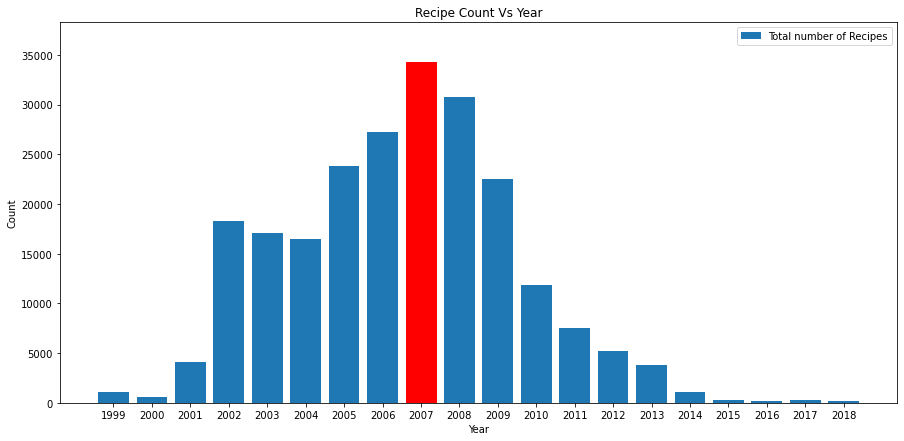

In [12]:
#grouping by recipes and finding when there were a lot of recipes posted
year_vs_count=pd.DataFrame(recipes_df.groupby(recipes_df['submitted_parsed'].dt.year).count()['recipe_id'])

#plotting
# Generate a bar plot showing the total number of recipes posted.

#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=year_vs_count.index
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, year_vs_count['recipe_id'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Recipe Count Vs Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,max(year_vs_count['recipe_id'])+4000)
plt.legend(['Total number of Recipes'], loc="best")
plt.xticks(xaxis,[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
barlist[8].set_color('r')
plt.show()


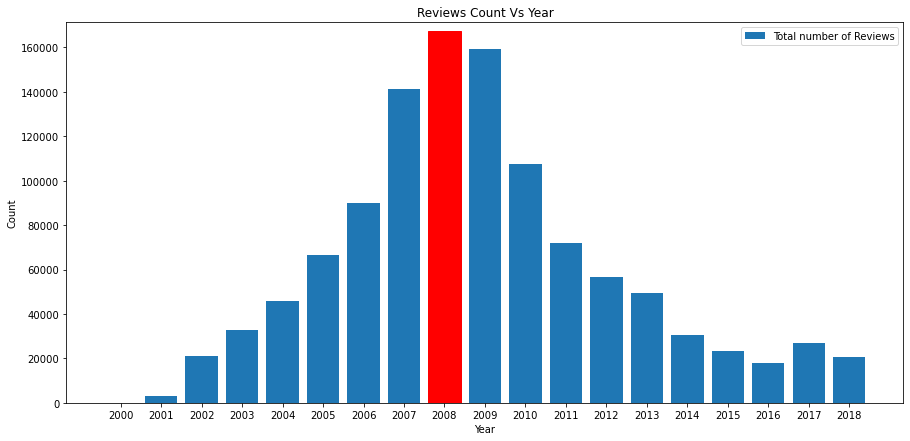

In [13]:
#grouping by reviews and finding when there which year has a lot of recipes posted
year_vs_count_reviews=pd.DataFrame(interaction_df.groupby(interaction_df['date_parsed'].dt.year).count()['recipe_id'])
year_vs_count_reviews

#plotting
# Generate a bar plot showing the total number of reviews posted.

#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=year_vs_count_reviews.index
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, year_vs_count_reviews['recipe_id'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Reviews Count Vs Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,max(year_vs_count_reviews['recipe_id'])+4000)
plt.legend(['Total number of Reviews'], loc="best")
plt.xticks(xaxis,[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
barlist[8].set_color('r')
plt.show()

In [14]:
#grouping by recipe id to find the maximum reviews count and finding teh recipe that is reviewed maximum
count_of_reviews=interaction_df.groupby(interaction_df['recipe_id']).count()['user_id']
average_rating=interaction_df.groupby(interaction_df['recipe_id']).mean()['rating']
recipe_reviews_df=pd.DataFrame({'total reviews': count_of_reviews,
                               'average rating':average_rating})
recipe_reviews_df

,total reviews,average rating
recipe_id,,
38,4,4.250000
39,1,3.000000
40,9,4.333333
41,2,4.500000
43,1,1.000000
...,...,...
537459,1,5.000000
537485,1,5.000000
537543,1,0.000000


In [15]:
#merging the reviews dataframe with the recipes by id

recipe_reviews_df=recipe_reviews_df.merge(recipes_df,on='recipe_id',how='left')
recipe_reviews_df=recipe_reviews_df.dropna()
recipe_reviews_df.count()

recipe_id           226650
total reviews       226650
average rating      226650
name                226650
minutes             226650
contributor_id      226650
submitted           226650
tags                226650
nutrition           226650
n_steps             226650
steps               226650
description         226650
ingredients         226650
n_ingredients       226650
submitted_parsed    226650
dtype: int64

In [16]:
#finding recipes that has 300+reviews and ratings greater than 4.5
top_rated_recipes=recipe_reviews_df.loc[(recipe_reviews_df['average rating']>=4.5)& (recipe_reviews_df['total reviews']>=500)]
top_rated_recipes['name']=top_rated_recipes['name'].str.title()


<ipython-input-16-d7a6c9f1508f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_recipes['name']=top_rated_recipes['name'].str.title()


In [17]:
top_rated_recipes=top_rated_recipes.reset_index(drop=True)
top_rated_recipes=top_rated_recipes.sort_values(by=['total reviews'],ascending=False)

#top 15 recipes
top_rated_recipes[['recipe_id','name','total reviews']]

,recipe_id,name,total reviews
6,39087,Creamy Cajun Chicken Pasta,1448
5,32204,Whatever Floats Your Boat Brownies,1220
9,69173,Kittencal S Italian Melt In Your Mouth Meatballs,997
11,82102,Kittencal S Moist Cheddar Garlic Oven Fried Ch...,855
3,28148,Oven Fried Chicken Chimichangas,802
8,63689,My Family S Favorite Sloppy Joes Pizza Joes,720
13,150863,Panera S Cream Cheese Potato Soup,714
10,77397,Kittencal S 5 Minute Cinnamon Flop Brunch Cake,627
4,29679,Reeses Squares 5 Ingredients No Bake Reese S,596
1,4627,Chicken Tortilla Soup Ii,591


In [79]:
recipes_25_reviews=recipe_reviews_df.loc[recipe_reviews_df['total reviews']>=25]

Calories=[]
total_fat=[]
sugar=[]
sodium=[]
protein=[]

for index,rows in recipes_25_reviews.iterrows():
    nutri=rows['nutrition'].strip('][').split(', ')
    Calories.append(nutri[0])
    total_fat.append(nutri[1])
    sugar.append(nutri[2])
    sodium.append(nutri[3])
    protein.append(nutri[4])
    
    
recipes_25_reviews["Calories"]=Calories
recipes_25_reviews['Total Fat']=total_fat
recipes_25_reviews['sugar']=sugar
recipes_25_reviews['sodium']=sodium
recipes_25_reviews['protein']=protein

recipes_25_reviews["Calories"]=pd.to_numeric(recipes_25_reviews["Calories"])
recipes_25_reviews["Total Fat"]=pd.to_numeric(recipes_25_reviews["Total Fat"])
recipes_25_reviews["sugar"]=pd.to_numeric(recipes_25_reviews["sugar"])
recipes_25_reviews["sodium"]=pd.to_numeric(recipes_25_reviews["sodium"])
recipes_25_reviews["protein"]=pd.to_numeric(recipes_25_reviews["protein"])

recipes_25_reviews.head()





<ipython-input-79-c7d02a439699>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews["Calories"]=Calories
<ipython-input-79-c7d02a439699>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews['Total Fat']=total_fat
<ipython-input-79-c7d02a439699>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,recipe_id,total reviews,average rating,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed,Calories,Total Fat,sugar,sodium,protein
59,153,48,3.791667,amish friendship bread and starter,70.0,1540.0,1999-09-06,"['time-to-make', 'course', 'cuisine', 'prepara...","[615.9, 32.0, 260.0, 15.0, 16.0, 19.0, 33.0]",19.0,"['place one cup each sugar , milk , and flour ...",many recipes have been posted for the amish br...,"['sugar', 'milk', 'flour', 'oil', 'eggs', 'van...",12.0,1999-09-06,615.9,32.0,260.0,15.0,16.0
82,192,29,4.689655,classic cream scones,85.0,1609.0,1999-08-13,"['weeknight', 'time-to-make', 'course', 'prepa...","[168.2, 12.0, 28.0, 3.0, 5.0, 24.0, 7.0]",20.0,"['preheat oven to 425f', 'lightly butter a bak...",you're best off describing scones to a german ...,"['all-purpose flour', 'granulated sugar', 'bak...",9.0,1999-08-13,168.2,12.0,28.0,3.0,5.0
87,198,49,4.367347,chinese hot and sour pork soup,40.0,1545.0,1999-09-18,"['60-minutes-or-less', 'time-to-make', 'course...","[368.7, 20.0, 41.0, 60.0, 63.0, 14.0, 10.0]",11.0,"['bring stock to a simmer', 'add soy sauce , p...",edited recipe from other viewers recomendations,"['chicken stock', 'lean pork', 'garlic and red...",17.0,1999-09-18,368.7,20.0,41.0,60.0,63.0
112,246,65,4.615385,lee s hot crab dip,45.0,25843.0,1999-09-01,"['60-minutes-or-less', 'time-to-make', 'course...","[180.7, 23.0, 7.0, 16.0, 16.0, 40.0, 1.0]",8.0,"['remove cartilage from crab meat', 'in a larg...",lee's hot crab dip,"['crabmeat', 'cream cheese', 'sour cream', 'ma...",10.0,1999-09-01,180.7,23.0,7.0,16.0,16.0
168,346,30,4.433333,potatoes tapas in garlic mayonnaise potatoes ...,20.0,1589.0,1999-08-18,"['30-minutes-or-less', 'time-to-make', 'course...","[184.2, 15.0, 10.0, 8.0, 4.0, 7.0, 7.0]",4.0,"['boil potatoes in salt water until tender', '...","""tapas, the little dishes of spain"" by penelop...","['salad potatoes', 'mayonnaise', 'garlic clove...",5.0,1999-08-18,184.2,15.0,10.0,8.0,4.0


In [ ]:
#plotting no of steps
sns.histplot(data=recipes_25_reviews, x="n_steps",kde=True,bins=35)

<AxesSubplot:xlabel='average rating', ylabel='Count'>

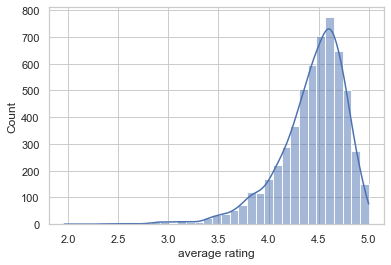

In [69]:
sns.histplot(data=recipes_25_reviews, x="average rating",kde=True,bins=35)

<AxesSubplot:xlabel='n_ingredients', ylabel='Count'>

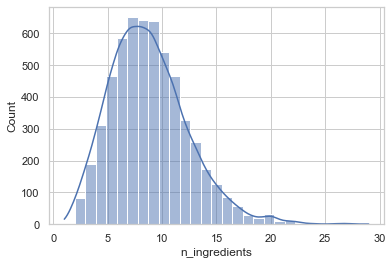

In [72]:
sns.histplot(data=recipes_25_reviews, x="n_ingredients",bins=29,kde=True)

<AxesSubplot:xlabel='Calories', ylabel='Count'>

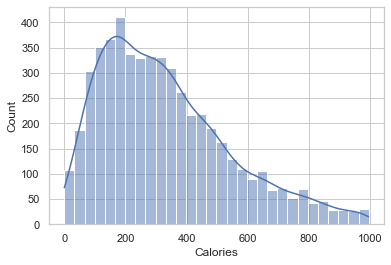

In [84]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.      
quartiles = recipes_25_reviews['Calories'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers=recipes_25_reviews.loc[(recipes_25_reviews['Calories']>lower_bound) & (recipes_25_reviews['Calories']<upper_bound)]
sns.histplot(data=outliers, x="Calories",bins=30,kde=True)

The median Calories is : 312.1


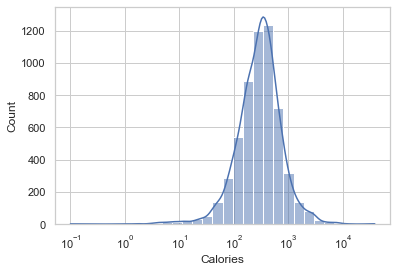

In [92]:
sns.histplot(data=recipes_25_reviews, x="Calories",bins=30,kde=True,log_scale=True)
median_Cal=recipes_25_reviews['Calories'].median()
print(f"The median Calories is : {median_Cal}")

<AxesSubplot:>

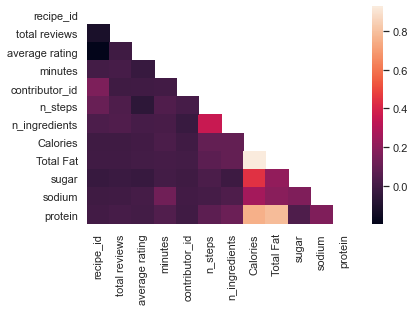

In [97]:
correlation=recipes_25_reviews.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,mask=mask)

In [99]:
#converting the ingrideints into list
ingredients=recipes_25_reviews['ingredients']
ingredient_list=[]
for i in ingredients:
    ingri=i.strip('][').split(', ')
    ingredient_list.append(ingri)
recipes_25_reviews['ingredients']=ingredient_list


AttributeError: 'list' object has no attribute 'strip'

In [112]:
#resetting index
recipes_25_reviews=recipes_25_reviews.reset_index(drop=True)
ing_list=[]
all_ingridients=[]
for index,rows in recipes_25_reviews.iterrows():
    ing_list=rows['ingredients']
    for ing in ing_list:
        ing=ing.lower()
        all_ingridients.append(ing)
    
        

In [129]:
ingridients_df=pd.DataFrame({'Ingridient':all_ingridients})
value=ingridients_df['Ingridient'].value_counts()
ingredients_count_df=pd.DataFrame({'Ingredient':value.index,
                                  'Count':value.values})
ingredients_count_df.sort_values(by=['Count'],ascending=False)
top_10=ingredients_count_df.head(10)
top_10


,Ingredient,Count
0,'salt',2561
1,'butter',1645
2,'sugar',1265
3,'water',1027
4,'onion',966
5,'eggs',949
6,'flour',876
7,'milk',747
8,'olive oil',711
9,'brown sugar',607


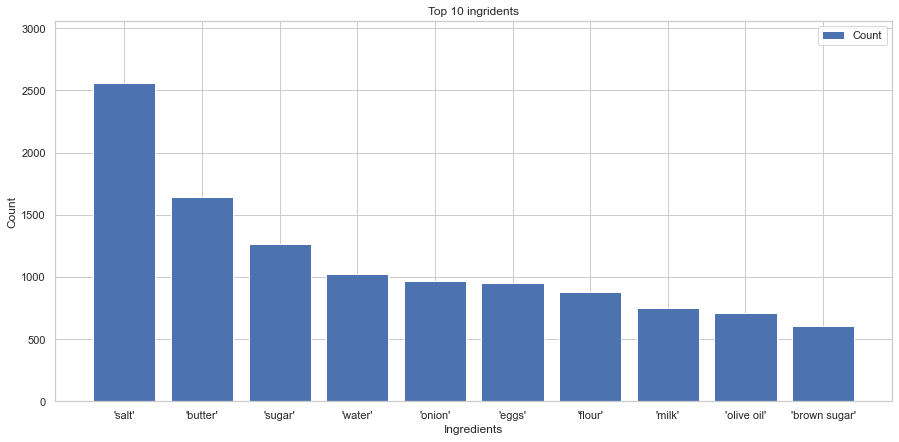

In [130]:
#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=top_10['Ingredient']
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, top_10['Count'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Top 10 ingridents')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.ylim(0,max(top_10['Count'])+500)
plt.legend(['Count'], loc="best")
#plt.xticks(xaxis,xaxis)
#barlist[8].set_color('r')
plt.show()

0.04


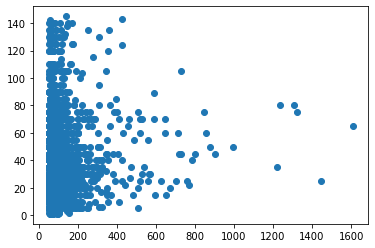

[]

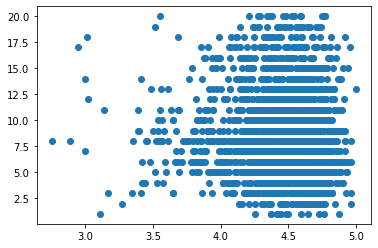

In [21]:
corr = top_recipes_50_reviews.corr()
corr

,recipe_id,total reviews,average rating,minutes,contributor_id,n_steps,n_ingredients
recipe_id,1.000000,-0.090239,-0.224054,0.045551,0.155003,0.102180,0.021553
total reviews,-0.090239,1.000000,-0.030437,0.002019,-0.013337,0.043076,0.051036
average rating,-0.224054,-0.030437,1.000000,-0.032394,0.019893,-0.055033,0.022609
minutes,0.045551,0.002019,-0.032394,1.000000,-0.004719,0.056502,-0.005432
contributor_id,0.155003,-0.013337,0.019893,-0.004719,1.000000,-0.008502,-0.032989
n_steps,0.102180,0.043076,-0.055033,0.056502,-0.008502,1.000000,0.336953
n_ingredients,0.021553,0.051036,0.022609,-0.005432,-0.032989,0.336953,1.000000


In [73]:
top_recipes_100_reviews=recipe_reviews_df.loc[(recipe_reviews_df['total reviews']>=100)]
Calories=[]
total_fat=[]
sugar=[]
sodium=[]
protein=[]

for index,rows in top_recipes_100_reviews.iterrows():
    nutri=rows['nutrition'].strip('][').split(', ')
    Calories.append(nutri[0])
    total_fat.append(nutri[1])
    sugar.append(nutri[2])
    sodium.append(nutri[3])
    protein.append(nutri[4])
    
    
top_recipes_100_reviews["Calories"]=Calories
top_recipes_100_reviews['Total Fat']=total_fat
top_recipes_100_reviews['sugar']=sugar
top_recipes_100_reviews['sodium']=sodium
top_recipes_100_reviews['protein']=protein







#top_recipes_100_reviews['nutrition']=ast.literal_eval(top_recipes_100_reviews['nutrition'])
#top_recipes_100_reviews['ingredients']=ast.literal_eval(top_recipes_100_reviews['ingredients'])

<ipython-input-73-c3a1724a6275>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recipes_100_reviews["Calories"]=Calories
<ipython-input-73-c3a1724a6275>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recipes_100_reviews['Total Fat']=total_fat
<ipython-input-73-c3a1724a6275>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [75]:
top_recipes_100_reviews["Calories"]=pd.to_numeric(top_recipes_100_reviews["Calories"])
top_recipes_100_reviews["Total Fat"]=pd.to_numeric(top_recipes_100_reviews["Total Fat"])
top_recipes_100_reviews["sugar"]=pd.to_numeric(top_recipes_100_reviews["sugar"])
top_recipes_100_reviews["sodium"]=pd.to_numeric(top_recipes_100_reviews["sodium"])
top_recipes_100_reviews["protein"]=pd.to_numeric(top_recipes_100_reviews["protein"])

top_recipes_100_reviews.dtypes

recipe_id                    int64
total reviews                int64
average rating             float64
name                        object
minutes                    float64
contributor_id             float64
submitted                   object
tags                        object
nutrition                   object
n_steps                    float64
steps                       object
description                 object
ingredients                 object
n_ingredients              float64
submitted_parsed    datetime64[ns]
Calories                   float64
Total Fat                  float64
sugar                      float64
sodium                     float64
protein                    float64
ingredient list             object
dtype: object

In [76]:
ingredients=top_recipes_100_reviews['ingredients']
ingredient_list=[]
for i in ingredients:
    ingri=i.strip('][').split(', ')
    ingredient_list.append(ingri)
top_recipes_100_reviews['ingredient list']=ingredient_list
top_recipes_100_reviews=top_recipes_100_reviews.reset_index(drop=True)
top_recipes_100_reviews.head()

,recipe_id,total reviews,average rating,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,...,description,ingredients,n_ingredients,submitted_parsed,Calories,Total Fat,sugar,sodium,protein,ingredient list
0,607,147,4.074830,famous barr s french onion soup,265.0,1634.0,1999-08-18,"['weeknight', 'time-to-make', 'course', 'main-...","[145.8, 10.0, 24.0, 45.0, 9.0, 19.0, 6.0]",18.0,...,one of st. louis's favorite soup recipes was r...,"['onions', 'butter', 'black pepper', 'paprika'...",12.0,1999-08-18,145.8,10.0,24.0,45.0,9.0,"['onions', 'butter', 'black pepper', 'paprika'..."
1,749,190,4.378947,zucchini lasagna lasagne low carb,60.0,1535.0,1999-09-14,"['60-minutes-or-less', 'time-to-make', 'course...","[261.1, 17.0, 42.0, 26.0, 48.0, 25.0, 5.0]",15.0,...,great for anyone going low carb or who has so ...,"['zucchini', 'lean ground beef', 'onion', 'tom...",15.0,1999-09-14,261.1,17.0,42.0,26.0,48.0,"['zucchini', 'lean ground beef', 'onion', 'tom..."
2,1005,129,4.480620,pizza dough and sauce,40.0,1535.0,1999-09-13,"['60-minutes-or-less', 'time-to-make', 'course...","[165.1, 5.0, 8.0, 18.0, 8.0, 2.0, 9.0]",19.0,...,i make the dough with 1/2 white and 1/2 wheat ...,"['yeast', 'warm water', 'salt', 'oil', 'flour'...",11.0,1999-09-13,165.1,5.0,8.0,18.0,8.0,"['yeast', 'warm water', 'salt', 'oil', 'flour'..."
3,1356,302,4.102649,ground beef stuffed green bell peppers with ch...,50.0,1555.0,1999-09-28,"['60-minutes-or-less', 'time-to-make', 'course...","[1389.5, 185.0, 53.0, 45.0, 56.0, 264.0, 16.0]",17.0,...,we had these not too long ago and we both deci...,"['green peppers', 'beef', 'onion', 'tomatoes',...",9.0,1999-09-28,1389.5,185.0,53.0,45.0,56.0,"['green peppers', 'beef', 'onion', 'tomatoes',..."
4,2496,516,4.500000,dark chocolate cake,60.0,1535.0,1999-10-23,"['60-minutes-or-less', 'time-to-make', 'course...","[189.1, 10.0, 80.0, 10.0, 5.0, 7.0, 10.0]",17.0,...,while it takes slightly longer to prepare this...,"['sugar', 'flour', 'baking cocoa', 'baking pow...",11.0,1999-10-23,189.1,10.0,80.0,10.0,5.0,"['sugar', 'flour', 'baking cocoa', 'baking pow..."


In [78]:

corr=top_recipes_100_reviews.corr()
corr

,recipe_id,total reviews,average rating,minutes,contributor_id,n_steps,n_ingredients,Calories,Total Fat,sugar,sodium,protein
recipe_id,1.000000,-0.092232,-0.230448,0.109437,0.717898,0.119237,-0.022756,0.027027,0.026768,-0.022612,-0.033556,0.060043
total reviews,-0.092232,1.000000,-0.066140,-0.011119,-0.059726,0.026744,0.053470,0.027321,0.045040,-0.005067,-0.022844,0.063037
average rating,-0.230448,-0.066140,1.000000,0.016820,-0.233778,-0.108530,0.006992,-0.036874,-0.007470,-0.050668,0.034498,-0.039341
minutes,0.109437,-0.011119,0.016820,1.000000,0.018663,0.056847,-0.032840,0.053870,-0.011217,-0.014520,0.132270,0.060775
contributor_id,0.717898,-0.059726,-0.233778,0.018663,1.000000,0.108672,-0.033468,0.070759,0.056080,-0.000599,0.005986,0.080857
n_steps,0.119237,0.026744,-0.108530,0.056847,0.108672,1.000000,0.272802,0.185789,0.111499,0.081909,0.010805,0.166316
n_ingredients,-0.022756,0.053470,0.006992,-0.032840,-0.033468,0.272802,1.000000,0.054710,0.036404,0.042811,0.041447,0.089909
Calories,0.027027,0.027321,-0.036874,0.053870,0.070759,0.185789,0.054710,1.000000,0.833446,0.479115,0.236947,0.646334
Total Fat,0.026768,0.045040,-0.007470,-0.011217,0.056080,0.111499,0.036404,0.833446,1.000000,0.211218,0.134178,0.550278
sugar,-0.022612,-0.005067,-0.050668,-0.014520,-0.000599,0.081909,0.042811,0.479115,0.211218,1.000000,0.217762,0.076672


In [53]:
interaction_df.loc[interaction_df['recipe_id']==38]

,user_id,recipe_id,date,rating,review,date_parsed
110593,596506,38,2008-02-13,5,"Yummy, yummy, yummy! I am a big fan of fruit a...",2008-02-13
110594,1060485,38,2009-01-15,4,very good!! the directions were alittle weird ...,2009-01-15
110595,1802956262,38,2014-07-22,4,This does taste great! I think the recipe need...,2014-07-22
110596,2123645,38,2014-08-14,4,Tasty and refreshing! I love the creamy flavor...,2014-08-14


In [103]:
recipes_df.loc[recipes_df['recipe_id']==38]

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed
126987,low fat berry blue frozen dessert,38,1485,1533,1999-08-09,"['weeknight', 'time-to-make', 'course', 'prepa...","[170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]",13,"['toss 2 cups berries with sugar', 'let stand ...","this is yummy and low-fat, it always turns out...","['blueberries', 'granulated sugar', 'vanilla y...",4,1999-08-09


In [123]:
top_recipes_100_reviews

,recipe_id,total reviews,average rating,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed,Calories,Total Fat,sugar,sodium,protein
632,2496,516,4.500000,dark chocolate cake,60,1535,1999-10-23,"['60-minutes-or-less', 'time-to-make', 'course...","[189.1, 10.0, 80.0, 10.0, 5.0, 7.0, 10.0]",17,"['heat oven to 350f', 'grease and flour two 9 ...",while it takes slightly longer to prepare this...,"['sugar', 'flour', 'baking cocoa', 'baking pow...",11,1999-10-23,189.1,10.0,80.0,10.0,5.0
1189,3595,131,4.564885,better than sex cake iii,50,1758,1999-09-23,"['60-minutes-or-less', 'time-to-make', 'course...","[322.2, 20.0, 80.0, 14.0, 8.0, 22.0, 16.0]",8,"['preheat oven to 350f', 'grease and lightly f...",it is my understanding that there are a variet...,"['dark chocolate cake mix', 'water', 'vegetabl...",8,1999-09-23,322.2,20.0,80.0,14.0,8.0
1196,3603,161,4.801242,hooters buffalo wings,27,2353,1999-09-24,"['30-minutes-or-less', 'time-to-make', 'course...","[867.1, 96.0, 2.0, 59.0, 97.0, 128.0, 8.0]",16,"['combine the flour , paprika , cayenne pepper...",from top secret recipes http://www.topsecretre...,"['butter', 'louisiana hot sauce', 'pepper', 'g...",12,1999-09-24,867.1,96.0,2.0,59.0,97.0
1271,3745,104,4.586538,blueberry oatmeal muffins,35,1533,1999-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[164.1, 6.0, 47.0, 9.0, 8.0, 4.0, 9.0]",10,"['heat oven to 400f', 'line 12 medium muffin c...",NaN,"['egg whites', 'plain nonfat yogurt', 'margari...",12,1999-10-29,164.1,6.0,47.0,9.0,8.0
1430,4075,100,4.790000,chocolate mint candy fudge,30,1535,1999-11-06,"['30-minutes-or-less', 'time-to-make', 'course...","[60.2, 4.0, 31.0, 0.0, 1.0, 8.0, 2.0]",16,"['in a heavy saucepan , melt chocolate chips w...",i love this recipe because it is so easy to ma...,"['semi-sweet chocolate chips', 'sweetened cond...",6,1999-11-06,60.2,4.0,31.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142109,262140,185,4.578378,cheesy ham and potato soup,30,240552,2007-10-30,"['ham', '30-minutes-or-less', 'time-to-make', ...","[325.1, 31.0, 8.0, 38.0, 30.0, 61.0, 7.0]",10,"['combine potatoes , celery , carrots , onion ...",comfort soup at its finest! i usually make th...,"['potatoes', 'celery', 'onion', 'carrot', 'ham...",13,2007-10-30,325.1,31.0,8.0,38.0,30.0
176389,340621,100,4.590000,our daily bread in a crock weekly make and b...,20190,242729,2008-12-01,"['time-to-make', 'course', 'main-ingredient', ...","[727.9, 3.0, 2.0, 60.0, 42.0, 1.0, 50.0]",16,['pour the warm water into a large mixing bowl...,make up a large batch of rustic artisanal brea...,"['warm water', 'fast rising yeast', 'sea salt'...",4,2008-12-01,727.9,3.0,2.0,60.0,42.0
224584,486261,217,4.990783,mexican stack up rsc,75,226863,2012-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[793.0, 83.0, 10.0, 34.0, 87.0, 131.0, 11.0]",28,"['preheat broiler to high broil', 'set the rac...","ready, set, cook! reynolds wrap contest entry....","['poblano pepper', 'reynolds wrap foil', 'oliv...",22,2012-09-01,793.0,83.0,10.0,34.0,87.0
224642,486496,202,4.752475,bacon lattice tomato muffins rsc,60,2390546,2012-09-06,"['weeknight', '60-minutes-or-less', 'time-to-m...","[664.3, 71.0, 42.0, 68.0, 37.0, 101.0, 14.0]",20,['preheat oven to 400f line a rimmed baking sh...,"""ready, set, cook! contest entry."" bacon latti...","['reynolds wrap foil', 'bacon', 'flakey biscui...",11,2012-09-06,664.3,71.0,42.0,68.0,37.0


In [106]:
recipes_df.dtypes

name                        object
recipe_id                    int64
minutes                      int64
contributor_id               int64
submitted                   object
tags                        object
nutrition                   object
n_steps                      int64
steps                       object
description                 object
ingredients                 object
n_ingredients                int64
submitted_parsed    datetime64[ns]
dtype: object